In [1]:
import numpy as np
import pylab
import time
from pathlib import Path

from PyBoltzRun import *

In [2]:
import sys
sys.path

['/Users/jonesb/Documents/Work/PyBoltzTmp/MAGBOLTZ-py/src/Examples',
 '/lib',
 '/bindings/pyroot',
 '/Users/jonesb/Documents/Work/PyBoltzTmp/MAGBOLTZ-py/src/Examples',
 '/Users/jonesb/Documents/Work/SolarAtmosphere/MCEq',
 '/Users/jonesb/Documents/Work/PyBoltzTmp/MAGBOLTZ-py/src/Cython',
 '/usr/local/Cellar/python/3.7.4/Frameworks/Python.framework/Versions/3.7/lib/python37.zip',
 '/usr/local/Cellar/python/3.7.4/Frameworks/Python.framework/Versions/3.7/lib/python3.7',
 '/usr/local/Cellar/python/3.7.4/Frameworks/Python.framework/Versions/3.7/lib/python3.7/lib-dynload',
 '',
 '/Users/jonesb/Library/Python/3.7/lib/python/site-packages',
 '/usr/local/lib/python3.7/site-packages',
 '/usr/local/lib/python3.7/site-packages/IPython/extensions',
 '/Users/jonesb/.ipython',
 '../hdf5_python',
 '../hdf5_python',
 '../hdf5_python',
 '../hdf5_python',
 '../hdf5_python',
 '../hdf5_python',
 '../hdf5_python',
 '../hdf5_python',
 '../hdf5_python',
 '../hdf5_python',
 '../hdf5_python',
 '../hdf5_python',

In [3]:
# Setup gases database                                                                                                                       
exec(Path("../Cython/Setup_npy.py").read_text())

In [4]:
# Set up helper object
PBRun=PyBoltzRun()

In [5]:
# Show list of available gases
PBRun.ListGases()

CF4 1
ARGON 2
HELIUM4 3
HELIUM3 4
NEON 5
KRYPTON 6
XENON 7
CH4 8
ETHANE 9
PROPANE 10
ISOBUTANE 11
CO2 12
H2O 14
OXYGEN 15
NITROGEN 16
HYDROGEN 21
DEUTERIUM 22
DME 25


In [6]:
# Configure settings for our simulation
MySettings   ={'Gases'                 :['NEON','CO2'],
               'Fractions'             :[99,1],
               'Max_collisions'        :4e7,
               'EField_Vcm'            :100,
               'Max_electron_energy'   :0,
               'Temperature_C'         :23,
               'Pressure_Torr'         :7500.062,
               'BField_Tesla'          :0,
               'BField_angle'          :0,
               'Angular_dist_model'    :1,
               'Enable_penning'        :0,
               'Enable_thermal_motion' :1,
               'ConsoleOutputFlag'     :0}

In [7]:
# Create empty lists to store outputs
DriftVels=[]
DriftVels_err=[]
DTs=[]
DLs=[]
DT1s=[]
DL1s=[]
DTs_err=[]
DLs_err=[]
DT1s_err=[]
DL1s_err=[]

In [8]:

# Run for each E field

EFields=np.arange(100,1000,100)
t1=time.time()
for E in EFields:
    print("Running with E Field " +str(E))

    MySettings['EField_Vcm']=E
    
    Output=PBRun.Run(MySettings)

    DriftVels.append(Output['Drift_vel'].val[2])
    DriftVels_err.append(Output['Drift_vel'].err[2])

    DTs.append(Output['DT'].val)
    DTs_err.append(Output['DT'].err)
    
    DLs.append(Output['DL'].val)
    DLs_err.append(Output['DL'].err)
    
    DT1s.append(Output['DT1'].val)
    DT1s_err.append(Output['DT1'].err)

    DL1s.append(Output['DL1'].val)
    DL1s_err.append(Output['DL1'].err)
t2=time.time()

print("Time elapsed:" +str(t2-t1))

Running with E Field 100
Running with E Field 200
Running with E Field 300
Running with E Field 400
Running with E Field 500
Running with E Field 600
Running with E Field 700
Running with E Field 800
Running with E Field 900
Time elapsed:777.9233160018921


In [9]:
# Lets look a what output info we have
print(Output.keys())

dict_keys(['Drift_vel', 'DT', 'DL', 'DT1', 'DL1', 'MeanEnergy', 'DTensor'])


Text(0, 0.5, 'Drift Velocity (mm/$\\mu$ s)')

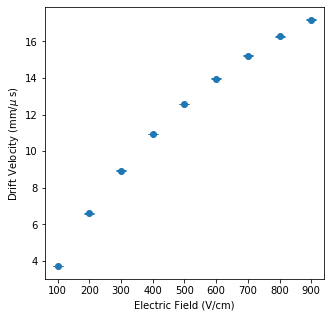

In [10]:
# Plot drift vel
pylab.figure(figsize=(5,5))
pylab.errorbar(EFields,DriftVels,DriftVels_err,capsize=5,fmt='o')
pylab.xlabel("Electric Field (V/cm)")
pylab.ylabel(r"Drift Velocity (mm/$\mu$ s)")

Text(0, 0.5, 'Diffusion (cm$^2$ s$^{-1}$)')

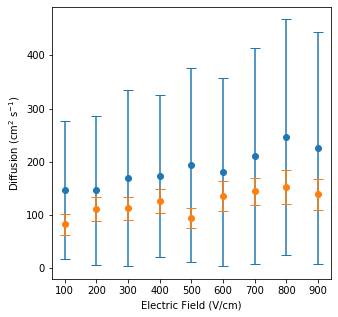

In [11]:
# Plot Diffusion in Einstein units
pylab.figure(figsize=(5,5))
pylab.errorbar(EFields,DTs,DTs_err,capsize=5,fmt='o',label="Transverse")
pylab.errorbar(EFields,DLs,DLs_err,capsize=5,fmt='o',label="Longitudinal")
pylab.xlabel("Electric Field (V/cm)")
pylab.ylabel(r"Diffusion (cm$^2$ s$^{-1}$)")

Text(0, 0.5, 'Diffusion ($\\mu$m cm$^{-\\frac{1}{2}}$)')

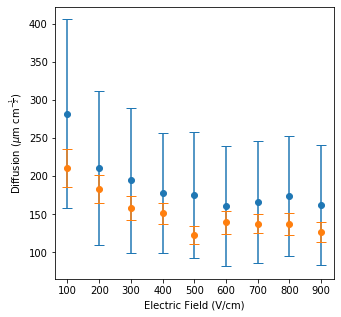

In [12]:
# Plot Diffusion in TPC units
pylab.figure(figsize=(5,5))
pylab.errorbar(EFields,DT1s,DT1s_err,capsize=5,fmt='o',label="Transverse")
pylab.errorbar(EFields,DL1s,DL1s_err,capsize=5,fmt='o',label="Longitudinal")
pylab.xlabel("Electric Field (V/cm)")
pylab.ylabel(r"Diffusion ($\mu$m cm$^{-\frac{1}{2}}$)")